<a href="https://colab.research.google.com/github/kasun98/british_airways/blob/main/task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [72]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

In [7]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 50
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scrapi

In [10]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,Not Verified | The flight was comfortable eno...
1,✅ Trip Verified | We had a really good flying...
2,✅ Trip Verified | Waited an hour to check-in ...
3,Not Verified | Not a great experience at all...
4,✅ Trip Verified | Boarding was difficult caus...


In [11]:
df.shape

(3771, 1)

In [12]:
df.to_csv("BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [16]:
df['reviews'][370]

'✅ Trip Verified |  I flew with hand baggage but security at Dubai was quick. Entered lounge which was a bit small but good and drink offerings sound. Flight on A380 left on time. Few technical issues with IFE which would have been really irritating had it been a day flight. Decent snack and slept well. Arrivals lounge excellent. Would recommend.'

In [17]:
#Define a function to clean the texts

def clean_text(text):
  # Remove "✅ Trip Verified |" or "Not Verified |" if it exists
  text = text.replace("✅ Trip Verified |", "").replace("Not Verified |","")
  return text

In [18]:
#Apply the function to dataframe

df['reviews'] = df['reviews'].apply(clean_text)
df.head()

,reviews
0,The flight was comfortable enough but with a...
1,We had a really good flying experience with ...
2,Waited an hour to check-in at the Paphos bus...
3,"Not a great experience at all, from the out..."
4,Boarding was difficult caused by vast majori...


In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [20]:
word_list = df['reviews'].to_list()

In [22]:
word_list = " ".join(word_list)

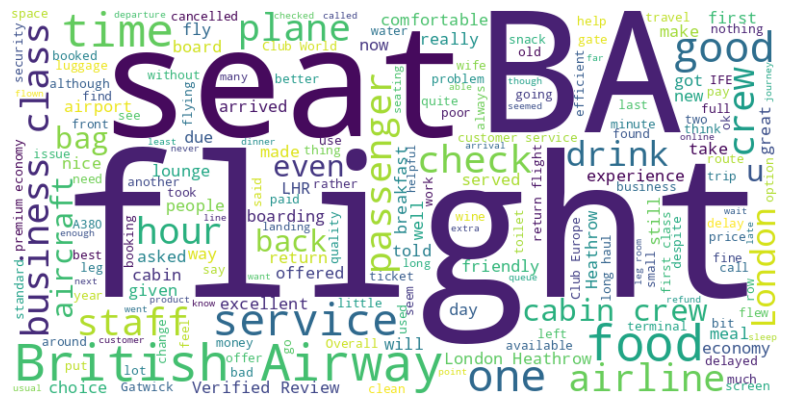

In [25]:
#wordcloud for the reviews

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis', random_state=42).generate(word_list)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [31]:

from textblob import TextBlob


# Perform sentiment analysis using TextBlob
df['sentiment'] = df['reviews'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Classify sentiment based on polarity score
df['sentiment_label'] = df['sentiment'].apply(lambda x: 'positive' if x > 0 else 'negative')

# Display the DataFrame with sentiment labels
df


,reviews,sentiment,sentiment_label
0,The flight was comfortable enough but with a...,-0.028571,negative
1,We had a really good flying experience with ...,0.162536,positive
2,Waited an hour to check-in at the Paphos bus...,-0.450000,negative
3,"Not a great experience at all, from the out...",-0.119231,negative
4,Boarding was difficult caused by vast majori...,-0.011190,negative
...,...,...,...
3766,This was a bmi Regional operated flight on a R...,0.091964,positive
3767,LHR to HAM. Purser addresses all club passenge...,0.173214,positive
3768,My son who had worked for British Airways urge...,0.143148,positive
3769,London City-New York JFK via Shannon on A318 b...,0.351667,positive


In [32]:
df = df.drop(['sentiment'], axis=1)

In [45]:
df

,reviews,sentiment_label,sentiment
0,The flight was comfortable enough but with a...,negative,0
1,We had a really good flying experience with ...,positive,1
2,Waited an hour to check-in at the Paphos bus...,negative,0
3,"Not a great experience at all, from the out...",negative,0
4,Boarding was difficult caused by vast majori...,negative,0
...,...,...,...
3766,This was a bmi Regional operated flight on a R...,positive,1
3767,LHR to HAM. Purser addresses all club passenge...,positive,1
3768,My son who had worked for British Airways urge...,positive,1
3769,London City-New York JFK via Shannon on A318 b...,positive,1


In [34]:
df['sentiment'] = df['sentiment_label'].apply(lambda x: '1' if x == 'positive' else '0')

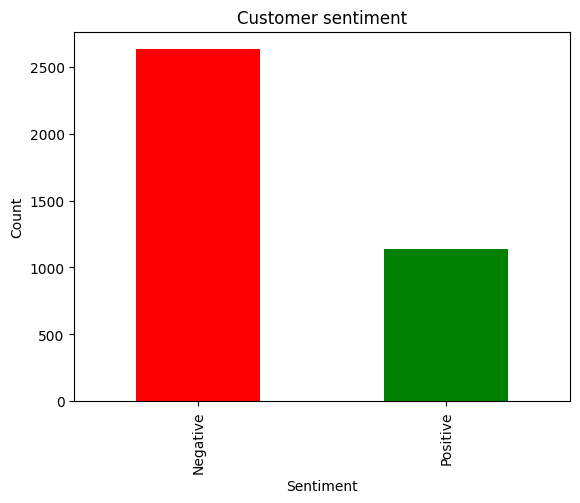

In [46]:
value_counts = df['sentiment'].value_counts()

colors = ['red', 'green']
value_counts.plot(kind='bar', color=colors)
plt.title('Customer sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.show()

In [124]:
df.head(2)

,reviews,sentiment_label,sentiment,cleaned_reviews,topic_assignment,dominant_topic
0,The flight was comfortable enough but with a...,negative,0,flight comfortable enough hour delay return le...,0,1
1,We had a really good flying experience with ...,positive,1,really good flying experience BA travelling yo...,4,3


In [47]:
import nltk
from nltk.corpus import stopwords
import string

In [48]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
nltk.download('stopwords')
stopwords.words('english')

In [55]:

def review_cleaning(review):

    #remove punctuations
    Test_punc_removed = [char for char in review if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)

    #remove stopwords
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    Test_clean = " ".join(Test_punc_removed_join_clean)
    return Test_clean

In [69]:
df['cleaned_reviews'] = df['reviews'].apply(review_cleaning)

In [111]:
df

,reviews,sentiment_label,sentiment,cleaned_reviews,topic_assignment,dominant_topic
0,The flight was comfortable enough but with a...,negative,0,flight comfortable enough hour delay return le...,0,1
1,We had a really good flying experience with ...,positive,1,really good flying experience BA travelling yo...,4,3
2,Waited an hour to check-in at the Paphos bus...,negative,0,Waited hour checkin Paphos business checkin St...,8,1
3,"Not a great experience at all, from the out...",negative,0,great experience outset poorly managed bused u...,8,1
4,Boarding was difficult caused by vast majori...,negative,0,Boarding difficult caused vast majority passen...,0,3
...,...,...,...,...,...,...
3766,This was a bmi Regional operated flight on a R...,positive,1,bmi Regional operated flight RJ145 Manchester ...,9,3
3767,LHR to HAM. Purser addresses all club passenge...,positive,1,LHR HAM Purser addresses club passengers name ...,6,3
3768,My son who had worked for British Airways urge...,positive,1,son worked British Airways urged fly British A...,9,1
3769,London City-New York JFK via Shannon on A318 b...,positive,1,London CityNew York JFK via Shannon A318 reall...,6,3


In [73]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer = review_cleaning, dtype = np.uint8)
reviews_vectorizer = vectorizer.fit_transform(df['cleaned_reviews'])

In [88]:
reviews_vectorizer

<3771x89 sparse matrix of type '<class 'numpy.uint8'>'
	with 140089 stored elements in Compressed Sparse Row format>

In [75]:
X = pd.DataFrame(reviews_vectorizer.toarray())
y = df['sentiment']

# Topic Modeling

In [116]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation


In [117]:

reviews = df['cleaned_reviews']


In [118]:
vectorizer = TfidfVectorizer(max_features=3000)
tfidf_matrix = vectorizer.fit_transform(reviews)

# Define the number of topics
num_topics = 5

lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_model.fit(tfidf_matrix)


LatentDirichletAllocation(n_components=5, random_state=42)

In [126]:
# Get the document-topic matrix from the LDA model
doc_topic_matrix = lda_model.transform(tfidf_matrix)

# Get the dominant topic for each document
dominant_topics = doc_topic_matrix.argmax(axis=1)

# Add the dominant topic column to the DataFrame
df['dominant_topic'] = dominant_topics

In [120]:
topic_words = []
for topic_idx, topic in enumerate(lda_model.components_):
  # Get the top 20 words for each topic
  top_20_words = vectorizer.get_feature_names_out()[topic.argsort()[-20:]]
  topic_words.append(top_20_words)

print("Topic Words:")
for i, topic in enumerate(topic_words):
  print(f"Topic {i+1}: {', '.join(topic)}")


Topic Words:
Topic 1: strong, chips, munich, wouldn, hence, extras, plugs, addition, monday, moscow, realized, 28, fear, needing, norwegian, edinburgh, somebody, arrives, corporate, considerable
Topic 2: class, told, seats, customer, heathrow, seat, time, hours, would, airline, get, one, staff, us, london, service, airways, british, ba, flight
Topic 3: december, lcy, moscow, headrest, arrives, corporate, reduce, cockpit, considerable, miss, fares, satisfied, constant, plugs, favourite, addition, wrote, chips, munich, dusseldorf
Topic 4: great, london, first, excellent, lounge, comfortable, business, time, economy, club, seats, class, ba, service, cabin, seat, crew, food, flight, good
Topic 5: arrives, initial, alternatives, employees, maximum, repeat, tag, checks, shopping, interaction, etihad, ex, honestly, generous, utter, hamburg, downside, 28, dhabi, abu


In [121]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to display word cloud for each topic
def display_wordcloud(lda_model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(lda_model.components_):
        print("Topic %d:" % (topic_idx))
        # Get the top words for the current topic
        top_words_idx = topic.argsort()[:-no_top_words - 1:-1]
        top_words = [feature_names[i] for i in top_words_idx]
        print(" ".join(top_words))
        # Create the word cloud
        wordcloud = WordCloud(width = 800, height = 400,
                        background_color ='white',
                        stopwords = None,
                        min_font_size = 10).generate(" ".join(top_words))
        # Plot the word cloud
        plt.figure(facecolor = None)
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.tight_layout(pad = 0)
        plt.show()

# Get feature names (words)
feature_names = vectorizer.get_feature_names_out()




Topic 0:
considerable corporate arrives somebody edinburgh norwegian needing fear 28 realized moscow monday addition plugs extras hence wouldn munich chips strong oslo eggs regards pm masks spite vegan florence shut sun hamburg flexibility caused happening inconsistent connections assigned pointed telling aug reclining avod aires needless that frustrated sofia transferred spotless efficiently


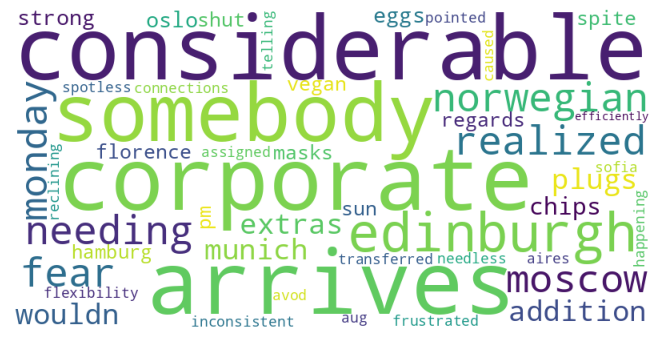

Topic 1:
flight ba british airways service london us staff one get airline would hours time seat heathrow customer seats told class even flights passengers business back could check plane luggage fly cabin food crew airport hour never review delayed economy booked verified another airlines return asked due got boarding bag cancelled


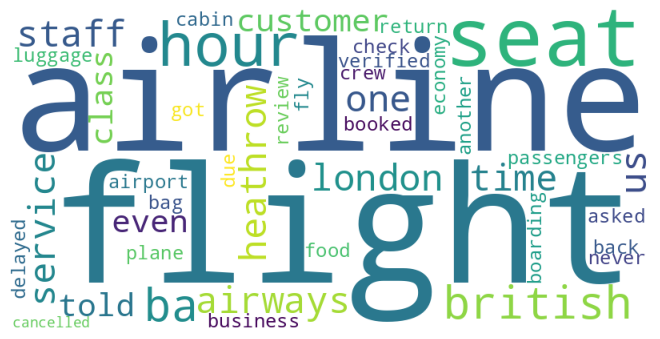

Topic 2:
dusseldorf munich chips wrote addition favourite plugs constant satisfied fares miss considerable cockpit reduce corporate arrives headrest moscow lcy december somebody leather smiling delivery edinburgh norwegian complimentary needing normal fear 28 realized reclining considering uk monday announcements perfectly extras 90 comfy hence free wouldn comparison a320 guy strong oslo eggs


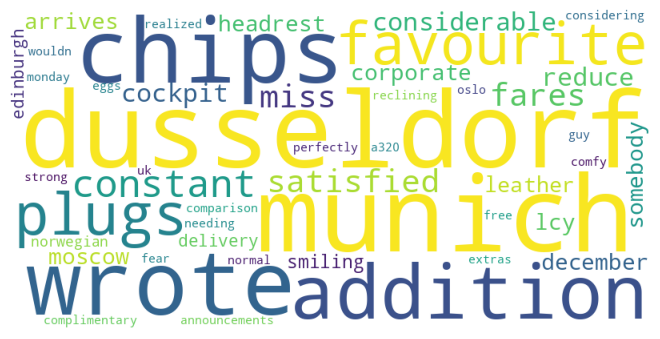

Topic 3:
good flight food crew seat cabin service ba class seats club economy time business comfortable lounge excellent first london great new return aircraft friendly heathrow world british drinks nice airways meal entertainment served breakfast staff really experience well boarding ok better flights overall lhr old flew selection a380 one ife


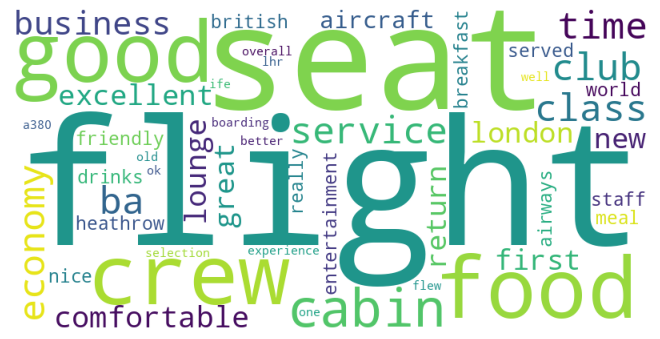

Topic 4:
abu dhabi 28 downside hamburg utter generous honestly ex etihad interaction shopping checks tag repeat maximum employees alternatives initial arrives opened april delivery menus vegas midnight duration vouchers settled glass sectors zero safety hoping continuing trips weekend series 1hr chat ones mess wrong orderly video following considerable view frills compete


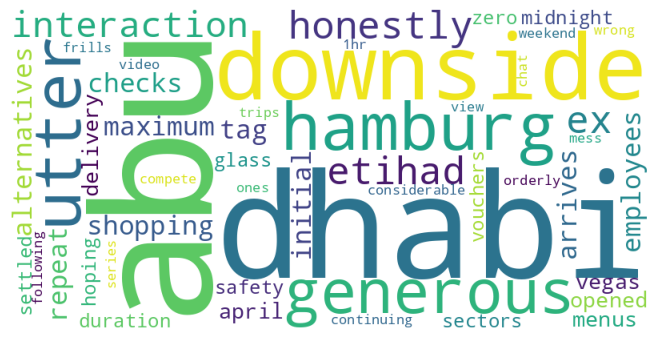

In [122]:
# Display word cloud for each topic
display_wordcloud(lda_model, feature_names, no_top_words=50)

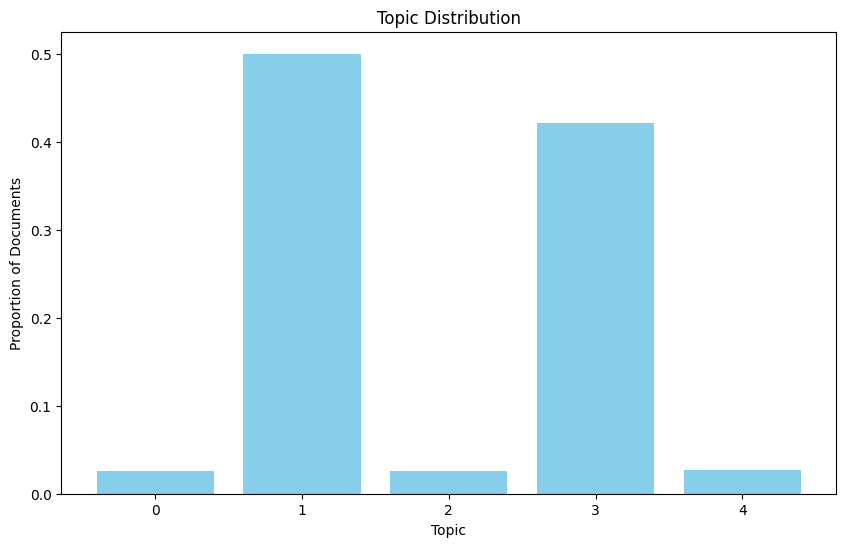

In [123]:
import numpy as np
import matplotlib.pyplot as plt

# Get the document-topic matrix from the LDA model
doc_topic_matrix = lda_model.transform(tfidf_matrix)

# Calculate the proportion of documents assigned to each topic
topic_distribution = np.sum(doc_topic_matrix, axis=0) / np.sum(doc_topic_matrix)

# Plot the topic distribution
plt.figure(figsize=(10, 6))
plt.bar(np.arange(len(topic_distribution)), topic_distribution, color='skyblue')
plt.xlabel('Topic')
plt.ylabel('Proportion of Documents')
plt.title('Topic Distribution')
plt.xticks(np.arange(len(topic_distribution)), np.arange(len(topic_distribution)))
plt.show()


In [128]:
df['dominant_topic'].unique()

array([1, 3])

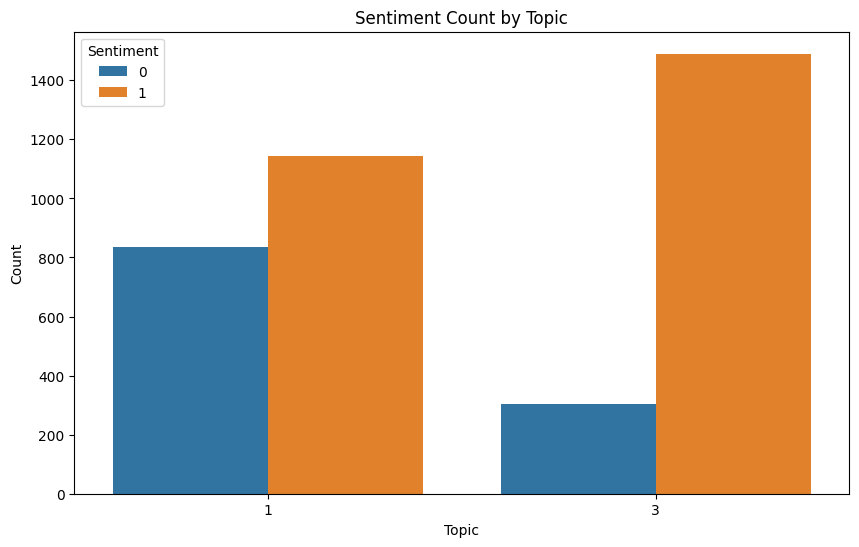

In [114]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='dominant_topic', hue='sentiment')
plt.title('Sentiment Count by Topic')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.legend(title='Sentiment', labels=['0', '1'])
plt.show()

In [133]:
df['sentiment'].value_counts()

1    2632
0    1139
Name: sentiment, dtype: int64

In [134]:
df['cleaned_reviews']

0       flight comfortable enough hour delay return le...
1       really good flying experience BA travelling yo...
2       Waited hour checkin Paphos business checkin St...
3       great experience outset poorly managed bused u...
4       Boarding difficult caused vast majority passen...
                              ...                        
3766    bmi Regional operated flight RJ145 Manchester ...
3767    LHR HAM Purser addresses club passengers name ...
3768    son worked British Airways urged fly British A...
3769    London CityNew York JFK via Shannon A318 reall...
3770    SINLHR BA12 B747436 First Class Old aircraft 1...
Name: cleaned_reviews, Length: 3771, dtype: object

In [137]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd




# Convert text data into numerical feature vectors
vectorizer = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed
X = vectorizer.fit_transform(df['cleaned_reviews'])

# Apply K-means clustering
num_clusters = 2  # Adjust the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

# Evaluate the clustering
silhouette_avg = silhouette_score(X, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

# Assign cluster labels to DataFrame
df['cluster'] = kmeans.labels_

# Display the clusters
print("Cluster Assignments:")
for cluster_num in range(num_clusters):
    print(f"Cluster {cluster_num}:")
    print(df[df['cluster'] == cluster_num]['cleaned_reviews'])
    print()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.007155912262316518
Cluster Assignments:
Cluster 0:
0       flight comfortable enough hour delay return le...
1       really good flying experience BA travelling yo...
3       great experience outset poorly managed bused u...
4       Boarding difficult caused vast majority passen...
5       Boarding started delay 20 minutes everybody co...
                              ...                        
3764    Flight Heathrow Toronto Booked emergency exit ...
3765    Business LHR BKK 747400 First try back BA 5 ye...
3767    LHR HAM Purser addresses club passengers name ...
3769    London CityNew York JFK via Shannon A318 reall...
3770    SINLHR BA12 B747436 First Class Old aircraft 1...
Name: cleaned_reviews, Length: 2336, dtype: object

Cluster 1:
2       Waited hour checkin Paphos business checkin St...
6       Absolutely horrible customer service never fly...
11      never flying BA first last flying Singapore tr...
14      bought return trip BA Webjet Australia last ye

In [139]:
df.head(10)

,reviews,sentiment_label,sentiment,cleaned_reviews,topic_assignment,dominant_topic,cluster
0,The flight was comfortable enough but with a...,negative,0,flight comfortable enough hour delay return le...,0,1,0
1,We had a really good flying experience with ...,positive,1,really good flying experience BA travelling yo...,4,3,0
2,Waited an hour to check-in at the Paphos bus...,negative,0,Waited hour checkin Paphos business checkin St...,8,1,1
3,"Not a great experience at all, from the out...",negative,0,great experience outset poorly managed bused u...,8,1,0
4,Boarding was difficult caused by vast majori...,negative,0,Boarding difficult caused vast majority passen...,0,3,0
5,Boarding started with a delay of some 20 min...,positive,1,Boarding started delay 20 minutes everybody co...,0,3,0
6,Absolutely horrible customer service - will ...,negative,0,Absolutely horrible customer service never fly...,2,1,1
7,BA is not what it used to be! As much as I l...,positive,1,BA used much like onboard crew check staff lac...,6,1,0
8,"BA First, it's not even the best business cl...",positive,1,BA First even best business class sky Cabin lo...,5,3,0
9,The worst business class experience. Ground ...,negative,0,worst business class experience Ground crew Si...,9,1,0
